 [3.5]实现线性判别分析，给出西瓜数据集3.0a的结果。    

In [109]:
import pandas as pd
dataset = pd.read_csv('3.0a.csv')
del dataset['编号']
x = dataset[["密度", "含糖率"]]
y = dataset['好瓜']
good_melon = dataset[dataset['好瓜'] == 1]
bad_melon = dataset[dataset['好瓜'] == 0]
del good_melon['好瓜']
del bad_melon['好瓜']

print(good_melon)


      密度    含糖率
0  0.697  0.460
1  0.774  0.376
2  0.634  0.264
3  0.608  0.318
4  0.556  0.215
5  0.403  0.237
6  0.481  0.149
7  0.437  0.211


In [110]:
import numpy as np
good_melon=good_melon.values
bad_melon=bad_melon.values
miu0=np.mean(bad_melon,axis=0,keepdims=True)
miu1=np.mean(good_melon,axis=0,keepdims=True)
miu0,miu1


(array([[0.49611111, 0.12752222]]), array([[0.57375, 0.27875]]))

In [111]:
cov0=np.cov(bad_melon,rowvar=False)
cov1=np.cov(good_melon,rowvar=False)
cov0,cov1

(array([[0.03791536, 0.00134467],
        [0.00134467, 0.01126058]]),
 array([[0.01669536, 0.01026121],
        [0.01026121, 0.01018564]]))

In [112]:
sw = cov1 + cov0
    # 求得参数w
swInv = np.linalg.inv(sw)
omiga = np.dot(swInv, miu0.T - miu1.T)
sw,omiga

(array([[0.05461072, 0.01160589],
        [0.01160589, 0.02144622]]),
 array([[ 0.08689997],
        [-7.09851492]]))

[-0.2        -0.18585859 -0.17171717 -0.15757576 -0.14343434 -0.12929293
 -0.11515152 -0.1010101  -0.08686869 -0.07272727 -0.05858586 -0.04444444
 -0.03030303 -0.01616162 -0.0020202   0.01212121  0.02626263  0.04040404
  0.05454545  0.06868687  0.08282828  0.0969697   0.11111111  0.12525253
  0.13939394  0.15353535  0.16767677  0.18181818  0.1959596   0.21010101
  0.22424242  0.23838384  0.25252525  0.26666667  0.28080808  0.29494949
  0.30909091  0.32323232  0.33737374  0.35151515  0.36565657  0.37979798
  0.39393939  0.40808081  0.42222222  0.43636364  0.45050505  0.46464646
  0.47878788  0.49292929  0.50707071  0.52121212  0.53535354  0.54949495
  0.56363636  0.57777778  0.59191919  0.60606061  0.62020202  0.63434343
  0.64848485  0.66262626  0.67676768  0.69090909  0.70505051  0.71919192
  0.73333333  0.74747475  0.76161616  0.77575758  0.78989899  0.8040404
  0.81818182  0.83232323  0.84646465  0.86060606  0.87474747  0.88888889
  0.9030303   0.91717172  0.93131313  0.94545455  0.

D:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='密度', ylabel='含糖率'>

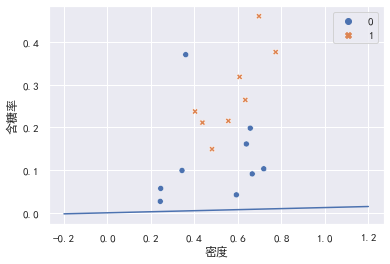

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
sns.scatterplot('密度', '含糖率', data=dataset, hue='好瓜', style='好瓜')
w = pd.DataFrame(columns=['x1', 'y1'])
omiga = omiga.flatten()
x1 = np.linspace(-0.2, 1.2, 100)
y1 = -omiga[0] * x1 / omiga[1]
w['x1']=x1
w['y1']=y1
print(x1)
print(y1)
# print(np.linspace(0, (-omiga[0] / omiga[1]),100))
sns.lineplot('x1', 'y1', data=w)
# sns.scatterplot(bad_melon['密度'],bad_melon['含糖率'],label='-',marker='_')
